In [34]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('DE_Filter.csv')

In [4]:
df.shape

(122854, 152)

In [6]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'weight', 'Finished', 'RecordedDate',
       'B2', 'B4', 'E5', 'ISO_3', 'country_agg', 'region_agg',
       'date_from_file', 'date', 'ISO2', 'age', 'B1_1.1', 'B1_1.2',
       'B1_1.NA', 'B1_2.1', 'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2',
       'B1_3.NA', 'B1_4.1', 'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2',
       'B1_5.NA', 'B1_6.1', 'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2',
       'B1_7.NA', 'B1_8.1', 'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2',
       'B1_9.NA', 'B1_10.1', 'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2',
       'B1_11.NA', 'B1_12.1', 'B1_12.2', 'B1_12.NA', 'B3.1', 'B3.2',
       'B3.NA', 'B5.1', 'B5.2', 'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1',
       'B7.2', 'B7.NA', 'B8.1', 'B8.2', 'B8.3', 'B8.NA', 'C0_1.1',
       'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2', 'C0_2.NA', 'C0_3.1',
       'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2', 'C0_4.NA', 'C0_5.1',
       'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2', 'C0_6.NA', 'C1_m.1',
       'C1_m.2', 'C1_m.NA',

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,weight,Finished,RecordedDate,B2,B4,E5,ISO_3,country_agg,...,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA,Cli,Cli_who
0,0,8,37104.693063,1,2020-12-01 00:12:57,20.0,NaN,NaN,DEU,Germany,...,0,0,1,0,0,0,0,1,0,0
1,1,30,12672.554193,1,2020-12-01 00:18:04,3.0,5.0,1.0,DEU,Germany,...,0,0,0,0,1,0,0,0,0,0
2,2,35,19036.774276,1,2020-12-01 00:13:48,5.0,1.0,2.0,DEU,Germany,...,1,0,0,0,0,0,1,0,0,0
3,3,39,23735.869785,1,2020-12-01 00:16:09,3.0,NaN,3.0,DEU,Germany,...,0,0,0,0,1,0,0,0,0,0
4,4,41,11145.038347,1,2020-12-01 00:16:34,5.0,NaN,1.0,DEU,Germany,...,0,0,0,0,0,1,0,0,0,0


# Training & Test

In [21]:
X = df.drop(['Unnamed: 0','Unnamed: 0.1','B2','B4','E5','B8.1','B8.2','B8.3','B8.NA','B7.1','B7.2','B7.NA','Cli','Cli_who','weight', 'Finished', 'RecordedDate','ISO_3', 'country_agg', 'region_agg','date_from_file', 'date', 'ISO2', 'age',], axis=1)
Y = df['B8.1']

In [22]:
X.shape

(122854, 128)

In [23]:
Y.shape

(122854,)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(98283, 128)
(24571, 128)
(98283,)
(24571,)


## Decision Tree

In [30]:
max_depth = np.arange(1, 10)
min_samples_leaf = [25,50,75,100,125,150,175,200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [31]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1' ,cv=5)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 75}


In [32]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)

Accuracy Score: 0.968987831183102
Area Under Curve: 0.7664956703929134
Recall score: 0.5401234567901234

Specificity: 0.9928678839957036
F1 score: 0.6475485661424607
Precision score: 0.8083140877598153
[[23109   166]
 [  596   700]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23275
           1       0.81      0.54      0.65      1296

    accuracy                           0.97     24571
   macro avg       0.89      0.77      0.82     24571
weighted avg       0.97      0.97      0.97     24571



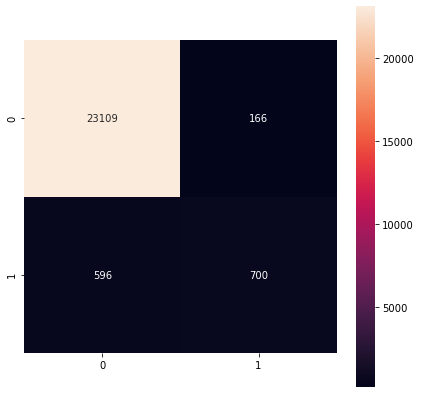

In [35]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

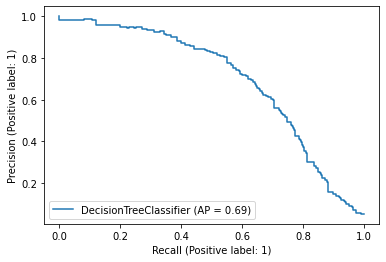

In [36]:
disp = plot_precision_recall_curve(my_model, X_test, Y_test)

In [37]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [38]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train)

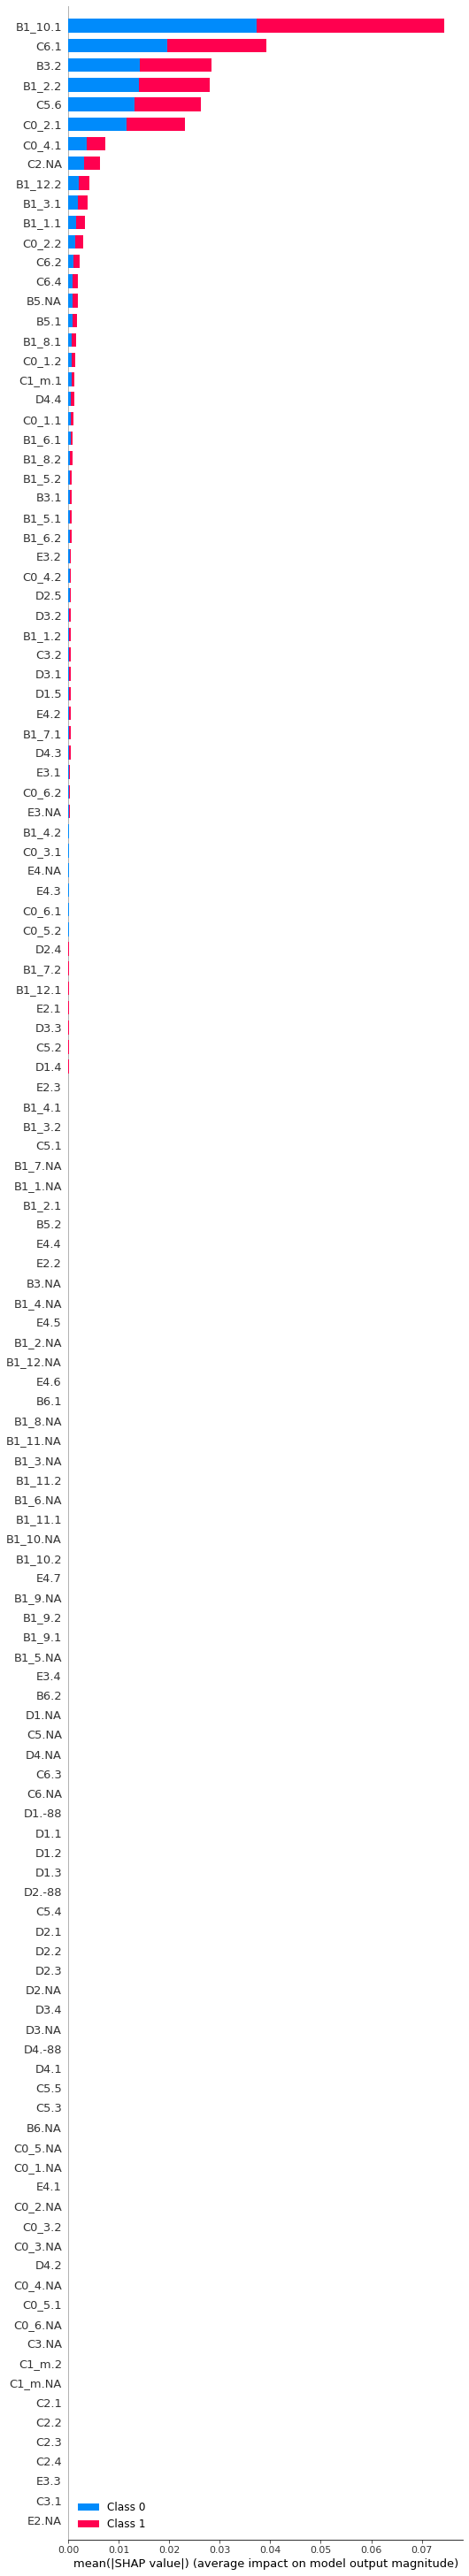

In [40]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train.columns))

## LogisticRegression

### No weights

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy Score: 0.9689064344145537
Area Under Curve: 0.7686386269907574
Recall score: 0.5447530864197531

Specificity: 0.9925241675617615
F1 score: 0.6488970588235293
Precision score: 0.8022727272727272
[[23101   174]
 [  590   706]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     23275
           1       0.80      0.54      0.65      1296

    accuracy                           0.97     24571
   macro avg       0.89      0.77      0.82     24571
weighted avg       0.97      0.97      0.97     24571



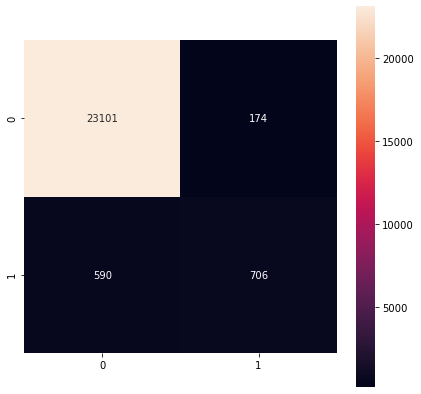

In [41]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

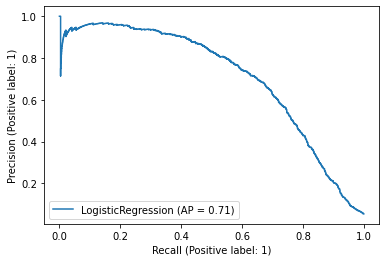

In [42]:
disp = plot_precision_recall_curve(lg1, X_test, Y_test)

## Weights. Web

In [43]:
# check the distribution
df['B8.1'].value_counts()/df.shape[0]

0    0.947336
1    0.052664
Name: B8.1, dtype: float64

In [44]:
# define class weights
w = {0:5, 1:95}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy Score: 0.9069227951650319
Area Under Curve: 0.8739984717083715
Recall score: 0.8371913580246914

Specificity: 0.9108055853920516
F1 score: 0.4868745793134396
Precision score: 0.3432458082885163
[[21199  2076]
 [  211  1085]]

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     23275
           1       0.34      0.84      0.49      1296

    accuracy                           0.91     24571
   macro avg       0.67      0.87      0.72     24571
weighted avg       0.96      0.91      0.92     24571



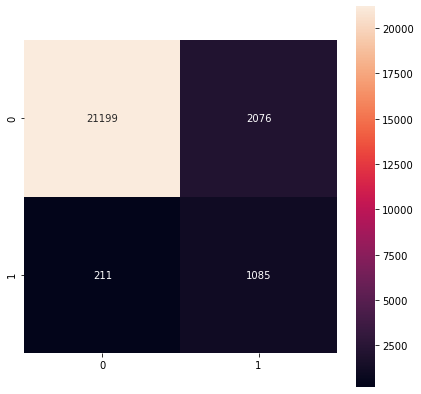

In [45]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

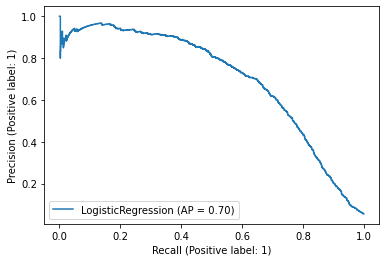

In [46]:
disp = plot_precision_recall_curve(lg2, X_test, Y_test)

## Weights. GridSearch

In [47]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [48]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.6409024631332267 with param: {'class_weight': {0: 1.0, 1: 1.0}}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [49]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy Score: 0.9689064344145537
Area Under Curve: 0.7686386269907574
Recall score: 0.5447530864197531

Specificity: 0.9925241675617615
F1 score: 0.6488970588235293
Precision score: 0.8022727272727272
[[23101   174]
 [  590   706]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     23275
           1       0.80      0.54      0.65      1296

    accuracy                           0.97     24571
   macro avg       0.89      0.77      0.82     24571
weighted avg       0.97      0.97      0.97     24571



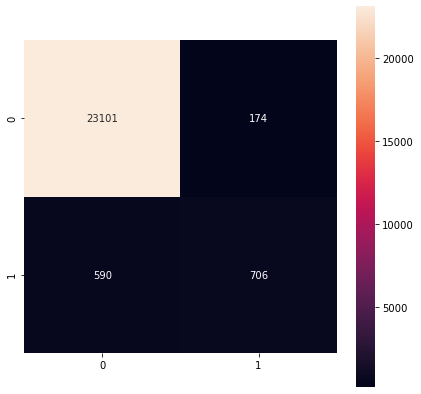

In [50]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

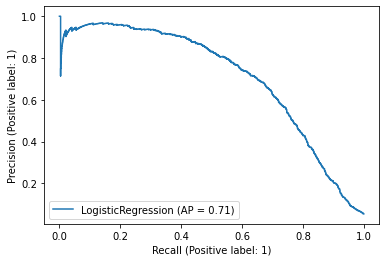

In [51]:
disp = plot_precision_recall_curve(lg3, X_test, Y_test)

## Cli & Cli_who

### Cli

In [52]:
X = df['Cli']
Y = df['B8.1']


X=X.values.reshape(-1,1)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Accuracy Score: 0.9490456228887714
Area Under Curve: 0.5745378989802549
Recall score: 0.1558641975308642

Specificity: 0.9932116004296455
F1 score: 0.2439613526570048
Precision score: 0.5611111111111111
[[23117   158]
 [ 1094   202]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23275
           1       0.56      0.16      0.24      1296

    accuracy                           0.95     24571
   macro avg       0.76      0.57      0.61     24571
weighted avg       0.93      0.95      0.94     24571



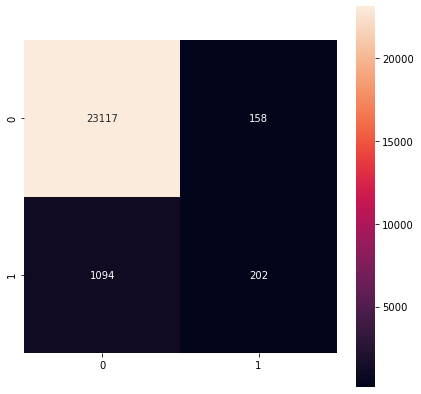

In [54]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Cli_who

In [55]:
X = df['Cli_who']
Y = df['B8.1']


X=X.values.reshape(-1,1)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Accuracy Score: 0.9496560986528835
Area Under Curve: 0.5664807687207437
Recall score: 0.1381172839506173

Specificity: 0.99484425349087
F1 score: 0.2244514106583072
Precision score: 0.5986622073578596
[[23155   120]
 [ 1117   179]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23275
           1       0.60      0.14      0.22      1296

    accuracy                           0.95     24571
   macro avg       0.78      0.57      0.60     24571
weighted avg       0.94      0.95      0.93     24571



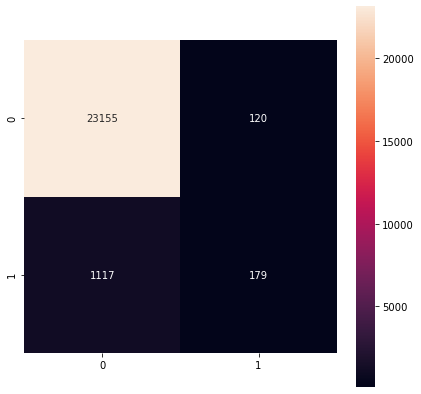

In [57]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Israel

In [81]:
X_israel = df[['E4.6','E3.1','E3.2','B1_2.1','B1_3.1','B1_1.1','B1_7.1','B1_12.1']]
Y_israel = df['B8.1']

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_israel, Y_israel, test_size = 0.2, random_state=2)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(98283, 8)
(24571, 8)
(98283,)
(24571,)


In [84]:
max_depth = np.arange(1, 10)
min_samples_leaf = [25,50,75,100,125,150,175,200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [85]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1' ,cv=5)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 25}


In [86]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)

Accuracy Score: 0.9497374954214318
Area Under Curve: 0.5723528563472172
Recall score: 0.15046296296296297

Specificity: 0.9942427497314715
F1 score: 0.24000000000000005
Precision score: 0.5927051671732523
[[23141   134]
 [ 1101   195]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23275
           1       0.59      0.15      0.24      1296

    accuracy                           0.95     24571
   macro avg       0.77      0.57      0.61     24571
weighted avg       0.94      0.95      0.94     24571



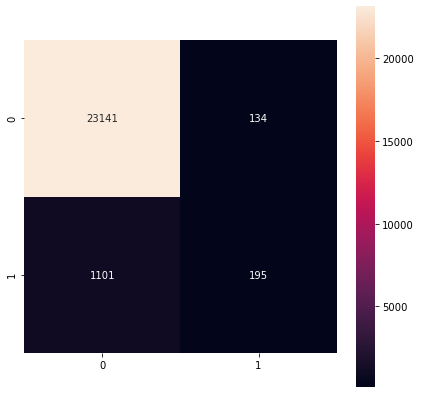

In [87]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

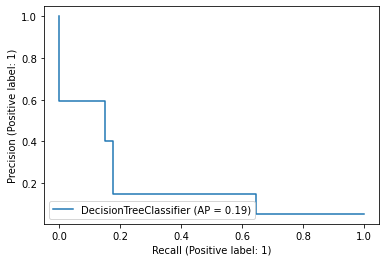

In [88]:
disp = plot_precision_recall_curve(my_model, X_test, Y_test)

In [89]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train)

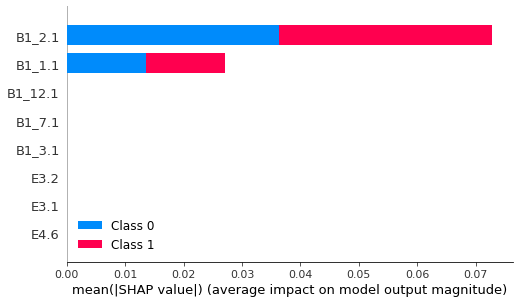

In [90]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train.columns))

## Logistic Regression

### No weights

Accuracy Score: 0.9492491148101421
Area Under Curve: 0.5516931382689528
Recall score: 0.10725308641975309

Specificity: 0.9961331901181525
F1 score: 0.1822950819672131
Precision score: 0.6069868995633187
[[23185    90]
 [ 1157   139]]

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     23275
           1       0.61      0.11      0.18      1296

    accuracy                           0.95     24571
   macro avg       0.78      0.55      0.58     24571
weighted avg       0.93      0.95      0.93     24571



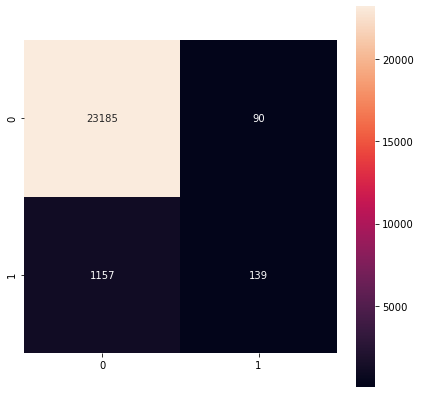

In [91]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

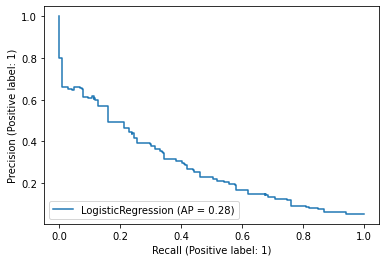

In [92]:
disp = plot_precision_recall_curve(lg1, X_test, Y_test)

### Weights. Web

In [93]:
# define class weights
w = {0:5, 1:95}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

Accuracy Score: 0.7657807985022994
Area Under Curve: 0.7284554972086301
Recall score: 0.6867283950617284

Specificity: 0.7701825993555317
F1 score: 0.23623092236230922
Precision score: 0.14265106587594165
[[17926  5349]
 [  406   890]]

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     23275
           1       0.14      0.69      0.24      1296

    accuracy                           0.77     24571
   macro avg       0.56      0.73      0.55     24571
weighted avg       0.93      0.77      0.83     24571



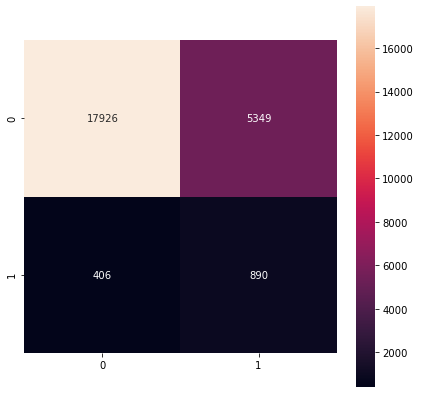

In [94]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

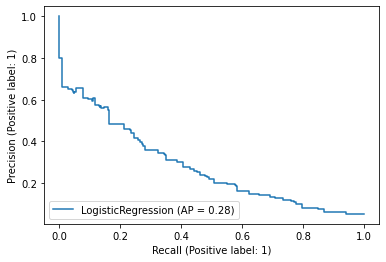

In [95]:
disp = plot_precision_recall_curve(lg2, X_test, Y_test)

### Weights. GridSearch

In [96]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [97]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.28450952917033645 with param: {'class_weight': {0: 1.0, 1: 10}}


In [98]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 10})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.8528346424646942
Area Under Curve: 0.7204866995531156
Recall score: 0.5725308641975309

Specificity: 0.8684425349087003
F1 score: 0.2909803921568628
Precision score: 0.1950578338590957
[[20213  3062]
 [  554   742]]

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     23275
           1       0.20      0.57      0.29      1296

    accuracy                           0.85     24571
   macro avg       0.58      0.72      0.60     24571
weighted avg       0.93      0.85      0.88     24571



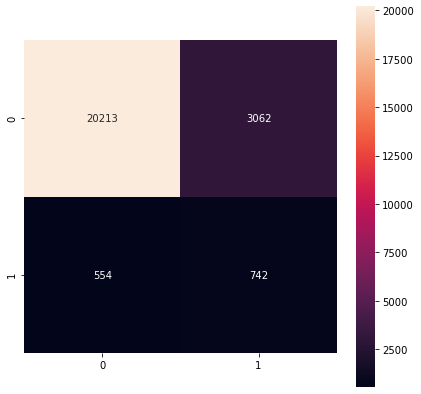

In [99]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

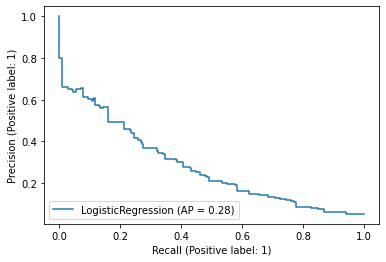

In [100]:
disp = plot_precision_recall_curve(lg3, X_test, Y_test)

## Spain

In [102]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'weight', 'Finished', 'RecordedDate',
       'B2', 'B4', 'E5', 'ISO_3', 'country_agg', 'region_agg',
       'date_from_file', 'date', 'ISO2', 'age', 'B1_1.1', 'B1_1.2',
       'B1_1.NA', 'B1_2.1', 'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2',
       'B1_3.NA', 'B1_4.1', 'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2',
       'B1_5.NA', 'B1_6.1', 'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2',
       'B1_7.NA', 'B1_8.1', 'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2',
       'B1_9.NA', 'B1_10.1', 'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2',
       'B1_11.NA', 'B1_12.1', 'B1_12.2', 'B1_12.NA', 'B3.1', 'B3.2',
       'B3.NA', 'B5.1', 'B5.2', 'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1',
       'B7.2', 'B7.NA', 'B8.1', 'B8.2', 'B8.3', 'B8.NA', 'C0_1.1',
       'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2', 'C0_2.NA', 'C0_3.1',
       'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2', 'C0_4.NA', 'C0_5.1',
       'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2', 'C0_6.NA', 'C1_m.1',
       'C1_m.2', 'C1_m.NA',

In [103]:
X_spain = df[['B1_10.1','B1_4.1','B1_2.1','B1_3.1','B1_1.1','B1_7.1','B1_12.1']]
Y_spain = df['B8.1']

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_spain, Y_spain, test_size = 0.2, random_state=2)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(98283, 7)
(24571, 7)
(98283,)
(24571,)


In [106]:
max_depth = np.arange(1, 10)
min_samples_leaf = [25,50,75,100,125,150,175,200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [107]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid,scoring='f1' ,cv=5)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 25}


In [108]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)

Accuracy Score: 0.9555980627569085
Area Under Curve: 0.7379331098911299
Recall score: 0.49459876543209874

Specificity: 0.9812674543501612
F1 score: 0.540244416350611
Precision score: 0.5951717734447539
[[22839   436]
 [  655   641]]

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     23275
           1       0.60      0.49      0.54      1296

    accuracy                           0.96     24571
   macro avg       0.78      0.74      0.76     24571
weighted avg       0.95      0.96      0.95     24571



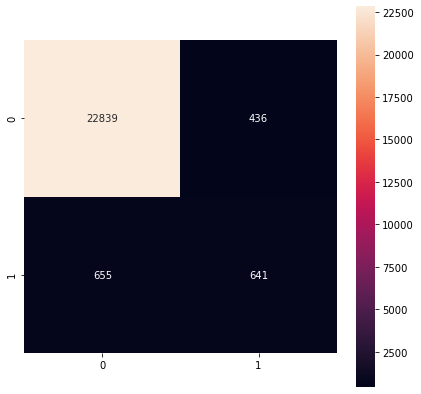

In [109]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

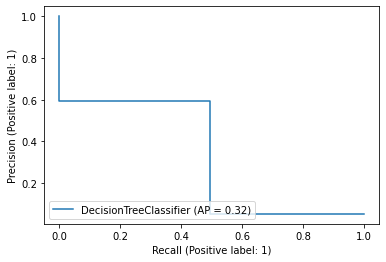

In [110]:
disp = plot_precision_recall_curve(my_model, X_test, Y_test)

In [111]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_train)

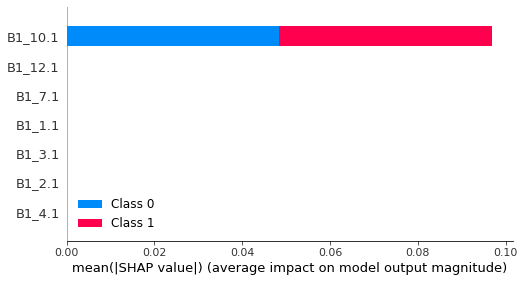

In [112]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train.columns))

## LogisticRegression

### No weights

Accuracy Score: 0.9575108868177933
Area Under Curve: 0.6664430587049636
Recall score: 0.3410493827160494

Specificity: 0.9918367346938776
F1 score: 0.45850622406639
Precision score: 0.6993670886075949
[[23085   190]
 [  854   442]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     23275
           1       0.70      0.34      0.46      1296

    accuracy                           0.96     24571
   macro avg       0.83      0.67      0.72     24571
weighted avg       0.95      0.96      0.95     24571



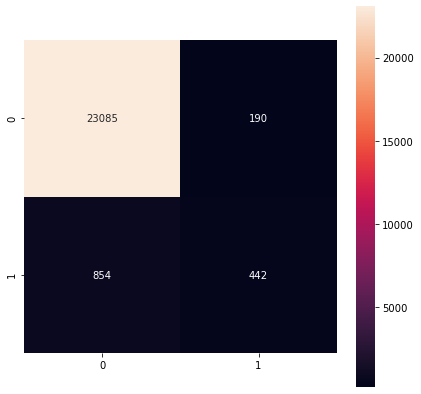

In [113]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

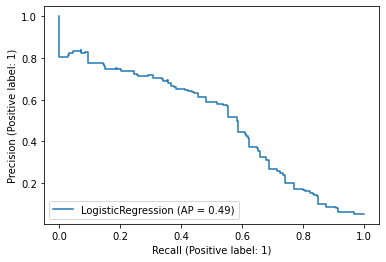

In [114]:
disp = plot_precision_recall_curve(lg1, X_test, Y_test)

### Weights. Web

In [115]:
# define class weights
w = {0:5, 1:95}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

Accuracy Score: 0.8560498148223515
Area Under Curve: 0.8045201628409648
Recall score: 0.7469135802469136

Specificity: 0.8621267454350161
F1 score: 0.3537365247579024
Precision score: 0.23174527172611922
[[20066  3209]
 [  328   968]]

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     23275
           1       0.23      0.75      0.35      1296

    accuracy                           0.86     24571
   macro avg       0.61      0.80      0.64     24571
weighted avg       0.94      0.86      0.89     24571



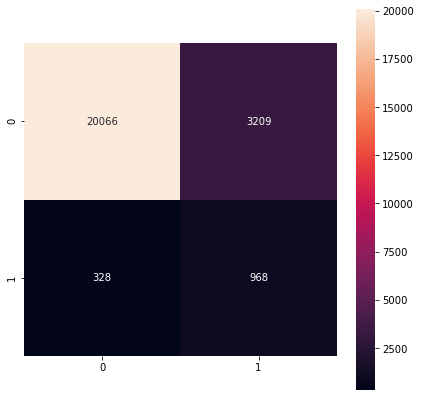

In [116]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

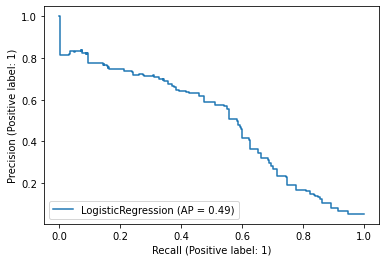

In [117]:
disp = plot_precision_recall_curve(lg2, X_test, Y_test)

### Weights. GridSearch

In [118]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [119]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.49581663082473926 with param: {'class_weight': {0: 1.0, 1: 10}}


In [120]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 10})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.9342721093972569
Area Under Curve: 0.787517868745939
Recall score: 0.6234567901234568

Specificity: 0.9515789473684211
F1 score: 0.5001547508511296
Precision score: 0.41757105943152456
[[22148  1127]
 [  488   808]]

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     23275
           1       0.42      0.62      0.50      1296

    accuracy                           0.93     24571
   macro avg       0.70      0.79      0.73     24571
weighted avg       0.95      0.93      0.94     24571



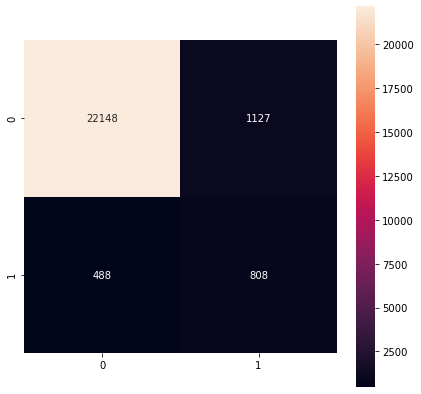

In [121]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

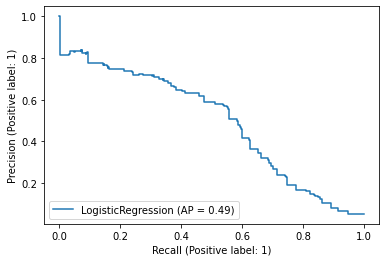

In [122]:
disp = plot_precision_recall_curve(lg3, X_test, Y_test)